In [1]:
import csv
from typing import Generator, List

def read_rows() -> Generator[List[str], None, None]:
    with open('mnist_784.arff', 'r') as file:
        for row in csv.reader(file):
            yield row

Let's examine the file a little.

The first row is always the header:

In [2]:
row_it = read_rows()
row = next(row_it)
print(row[:10], row[-1])
row_it.close()

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10'] class


We see that there are a bunch of pixels; to be exact, 785, based on 
https://api.openml.org/d/554.

What is "class"?

In [3]:
row_it = read_rows()
# ignore header row
next(row_it)
row = next(row_it)
print(row[-1])
row_it.close()

5


Ah, this must be the digit that this number represents.

We can assume that 1 - 9 literally means the digits 1 to 9, 
while 10 means the digit 0.

Let's visualize one of these.

In [4]:
import random

row_it = read_rows()
next(row_it)

for _ in range(random.randrange(1, 100)):
    row = next(row_it)
data_pt = row
row_it.close()

print("This represents", data_pt[-1])

# discard last data point (that's class)
data_pt = row[:-1]

# 784 is perfectly square rootable to 28, so we split this
# array into 28 x 28
grid = [list(map(lambda x: int(x), data_pt[i*28:(i+1)*28])) for i in range(len(data_pt) // 28)]

This represents 0


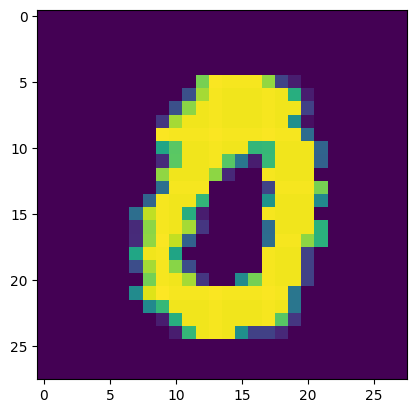

In [5]:
import matplotlib.pyplot as plt

# draw the thing with a scuffed plot
plt.imshow(grid, interpolation='nearest')

Below part visualizes the results of our own KNN.

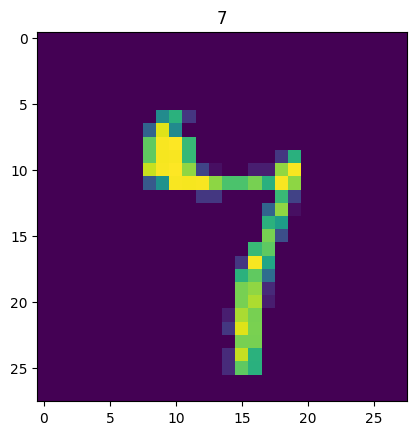

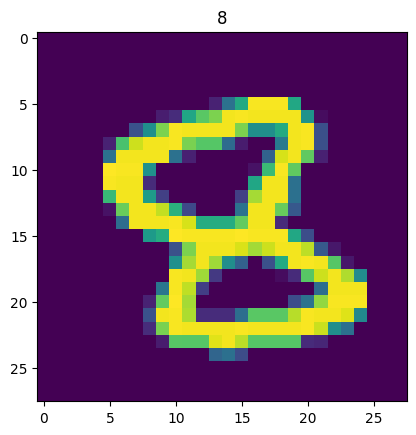

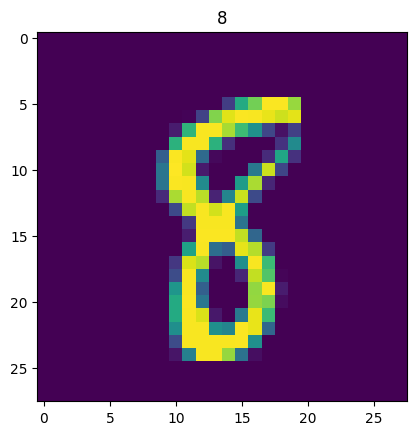

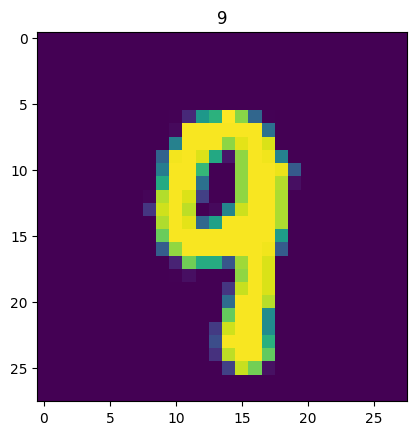

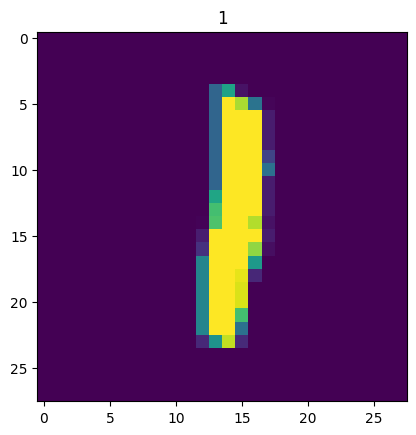

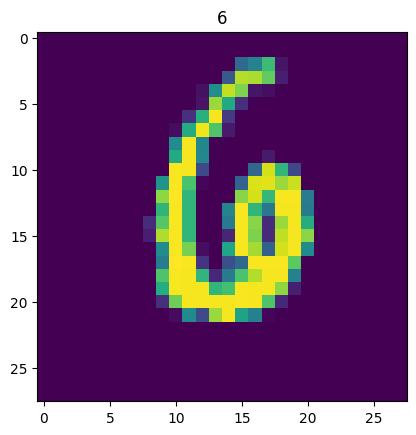

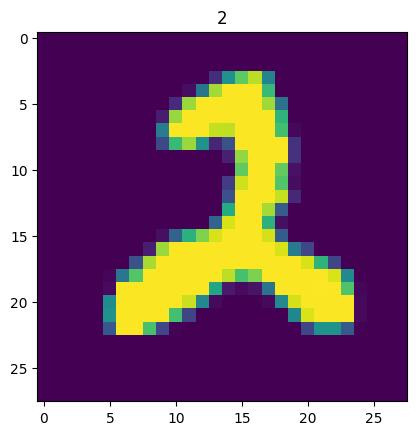

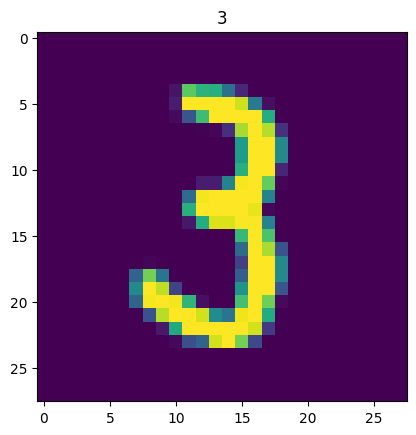

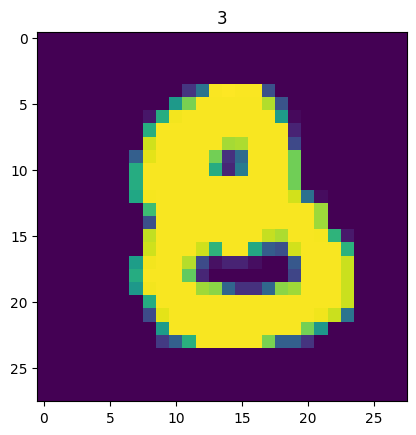

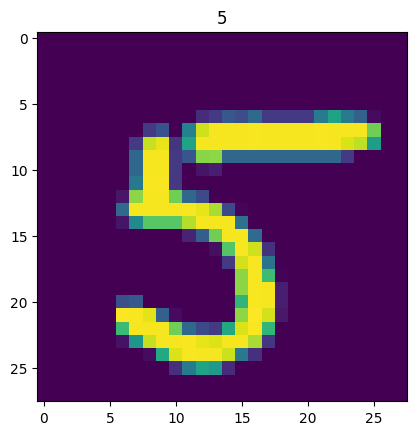

0


5


4


9


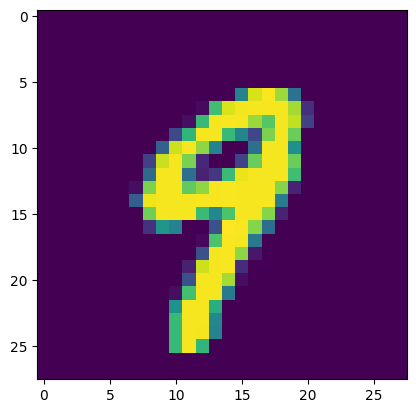

In [6]:
import matplotlib.pyplot as plt
import random
from own_knn import read_rows, convert_and_normalize, get_all_as_vectors, knn

some_vectors_and_classes = get_all_as_vectors()
training_set = some_vectors_and_classes[:10000]
test_set = random.sample(some_vectors_and_classes[10000:], 10)

correct = 0
for v in test_set:
    grid = [v[0][i*28:(i+1)*28] for i in range(len(v[0]) // 28)]
    plt.figure()
    plt.title(f"{knn(5, v[0], training_set)}")
    plt.imshow(grid, interpolation='nearest')

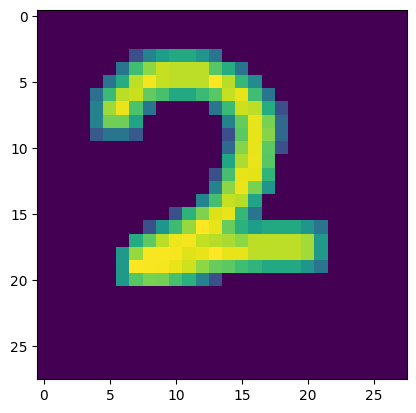

In [7]:
from img_to_vector import img_to_vector

vector = img_to_vector('input.png')
grid = [vector[i*28:(i+1)*28] for i in range(len(vector) // 28)]
plt.imshow(grid, interpolation='nearest')

In [8]:
knn(5, vector, training_set)

'2'